In [35]:
import re
import pandas as pd
from pathlib import Path

log_dir = Path("results10/")

rates = [50, 60, 70, 80, 90, 100]
psgs = [0, 1, 2, 3]
times = range(20)


data = []

for rate in rates:
    for psg in psgs:
        for t in times:
            filename = f"time{t}_rate{rate}_run_psg{psg}.txt"
            filepath = log_dir / filename
            if not filepath.exists():
                print(f"File not found: {filename}")
                continue

            with open(filepath, 'r') as file:
                content = file.read()

            s1_rates = [None] * 4
            m1_rates = [None] * 2

            s1_block_match = re.search(r"S1 Column firing rates:\n((?:col\d fires at .+?Hz\n?){4})", content)
            if s1_block_match:
                for line in s1_block_match.group(1).strip().splitlines():
                    match = re.match(r"col(\d) fires at ([\d\.eE+-]+)", line)
                    if match:
                        idx = int(match.group(1))
                        if idx < 4:
                            s1_rates[idx] = float(match.group(2))

            m1_block_match = re.search(r"M1 Column firing rates:\n((?:col\d fires at .+?Hz\n?){1,2})", content)
            if m1_block_match:
                for line in m1_block_match.group(1).strip().splitlines():
                    match = re.match(r"col(\d) fires at ([\d\.eE+-]+)", line)
                    if match:
                        idx = int(match.group(1))
                        if idx < 2:
                            m1_rates[idx] = float(match.group(2))

            data.append({
                "time": t,
                "rate": rate,
                "psg": psg,
                "S1_col0": s1_rates[0],
                "S1_col1": s1_rates[1],
                "S1_col2": s1_rates[2],
                "S1_col3": s1_rates[3],
                "M1_col0": m1_rates[0],
                "M1_col1": m1_rates[1],
            })

df = pd.DataFrame(data)

df.to_csv("column_firing_rate_summary.csv", index=False)
print(df.head())

   time  rate  psg   S1_col0   S1_col1   S1_col2   S1_col3   M1_col0   M1_col1
0     0    50    0  1.504274  1.106838  1.047009  0.944444  0.556818  0.482955
1     1    50    0  1.581197  1.051282  0.940171  1.017094  0.738636  0.397727
2     2    50    0  1.534188  1.094017  0.961538  0.948718  0.556818  0.454545
3     3    50    0  1.623932  1.170940  0.961538  1.085470  0.636364  0.505682
4     4    50    0  1.594017  0.918803  1.064103  0.910256  0.545455  0.380682


In [36]:
df

,time,rate,psg,S1_col0,S1_col1,S1_col2,S1_col3,M1_col0,M1_col1
0,0,50,0,1.504274,1.106838,1.047009,0.944444,0.556818,0.482955
1,1,50,0,1.581197,1.051282,0.940171,1.017094,0.738636,0.397727
2,2,50,0,1.534188,1.094017,0.961538,0.948718,0.556818,0.454545
3,3,50,0,1.623932,1.170940,0.961538,1.085470,0.636364,0.505682
4,4,50,0,1.594017,0.918803,1.064103,0.910256,0.545455,0.380682
...,...,...,...,...,...,...,...,...,...
475,15,100,3,0.940171,1.038462,1.081197,2.474359,1.062500,0.500000
476,16,100,3,0.901709,1.055556,0.987179,2.311966,0.948864,0.454545
477,17,100,3,1.128205,1.042735,0.970085,2.200855,1.039773,0.562500
478,18,100,3,0.987179,1.042735,0.901709,2.299145,0.829545,0.431818


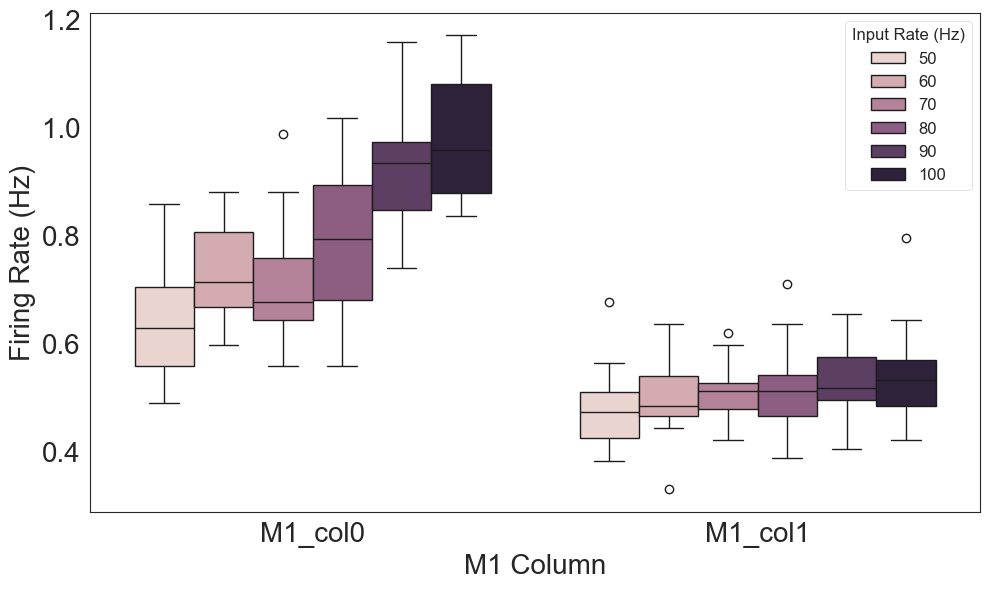

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_psg0 = df[df["psg"] == 0]

plot_df = pd.melt(
    df_psg0,
    id_vars=["rate"],
    value_vars=["M1_col0", "M1_col1"],
    var_name="col",
    value_name="firingrate"
)

plt.figure(figsize=(10, 6))
sns.boxplot(x="col", y="firingrate", hue="rate", data=plot_df)
plt.xlabel("M1 Column", fontsize=20)
plt.ylabel("Firing Rate (Hz)", fontsize=20)
# plt.title("M1 Firing Rates (S1 = 0) " , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
legend = plt.legend(title="Input Rate (Hz)", title_fontsize=12, fontsize=12)
legend.get_frame().set_linewidth(0.5)
plt.tight_layout()
plt.savefig("m1_psg0_boxplot.svg", format='svg')
plt.show()

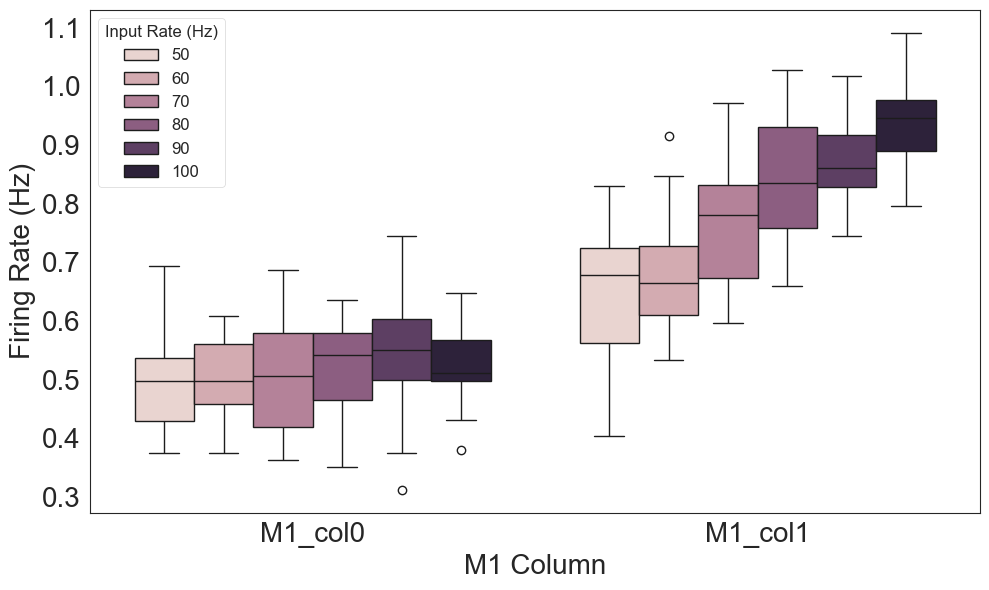

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_psg0 = df[df["psg"] == 1]

plot_df = pd.melt(
    df_psg0,
    id_vars=["rate"],
    value_vars=["M1_col0", "M1_col1"],
    var_name="col",
    value_name="firingrate"
)

plt.figure(figsize=(10, 6))
sns.boxplot(x="col", y="firingrate", hue="rate", data=plot_df)
plt.xlabel("M1 Column", fontsize=20)
plt.ylabel("Firing Rate (Hz)", fontsize=20)
# plt.title("M1 Firing Rates (S1 = 0) " , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
legend = plt.legend(title="Input Rate (Hz)", title_fontsize=12, fontsize=12)
legend.get_frame().set_linewidth(0.5)
plt.tight_layout()
plt.savefig("m1_psg0_boxplot.svg", format='svg')
plt.show()

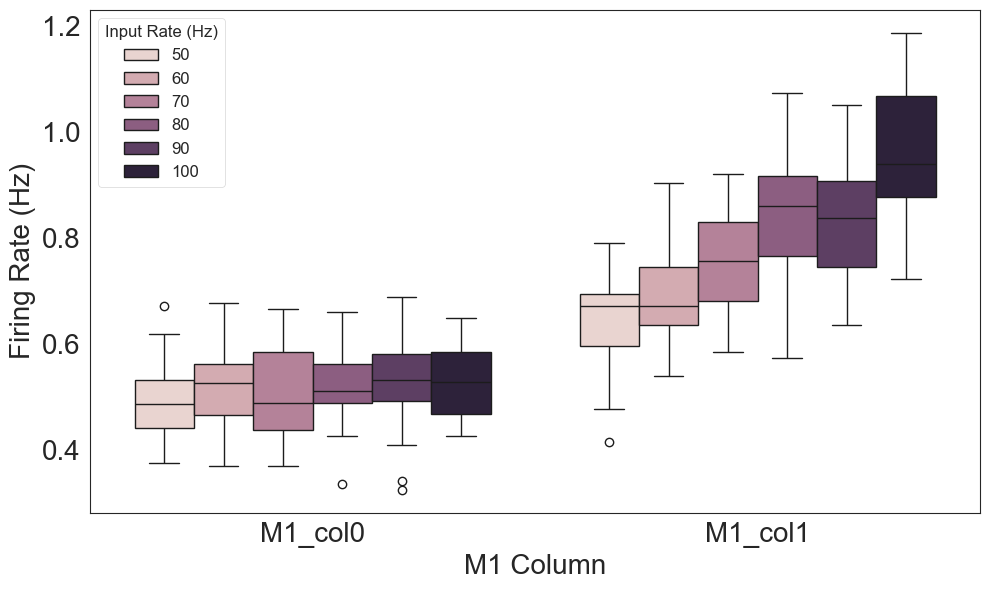

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_psg0 = df[df["psg"] == 2]

plot_df = pd.melt(
    df_psg0,
    id_vars=["rate"],
    value_vars=["M1_col0", "M1_col1"],
    var_name="col",
    value_name="firingrate"
)

plt.figure(figsize=(10, 6))
sns.boxplot(x="col", y="firingrate", hue="rate", data=plot_df)
plt.xlabel("M1 Column", fontsize=20)
plt.ylabel("Firing Rate (Hz)", fontsize=20)
# plt.title("M1 Firing Rates (S1 = 0) " , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
legend = plt.legend(title="Input Rate (Hz)", title_fontsize=12, fontsize=12)
legend.get_frame().set_linewidth(0.5)
plt.tight_layout()
plt.savefig("m1_psg0_boxplot.svg", format='svg')
plt.show()

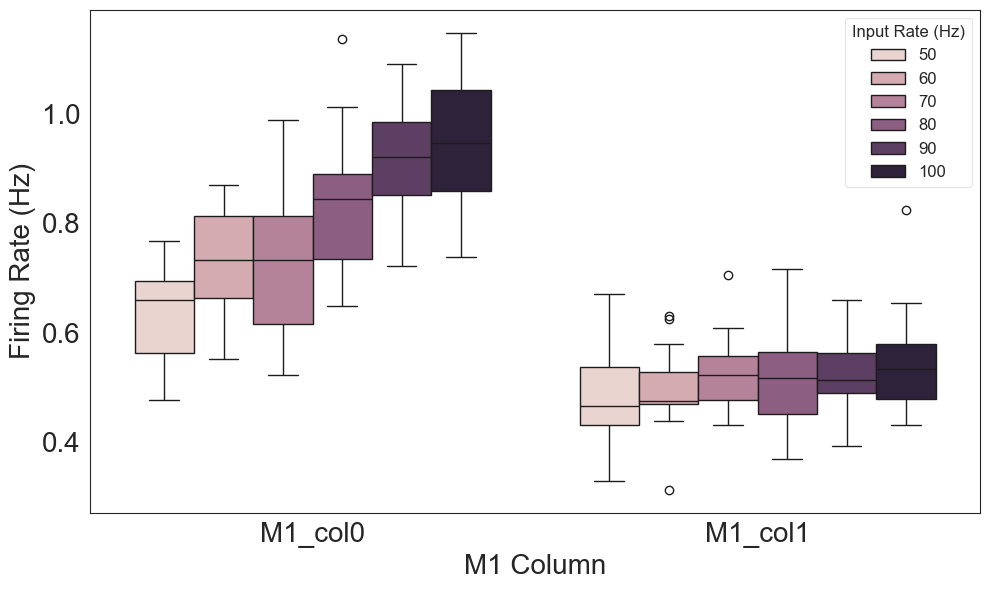

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_psg0 = df[df["psg"] == 3]

plot_df = pd.melt(
    df_psg0,
    id_vars=["rate"],
    value_vars=["M1_col0", "M1_col1"],
    var_name="col",
    value_name="firingrate"
)

plt.figure(figsize=(10, 6))
sns.boxplot(x="col", y="firingrate", hue="rate", data=plot_df)
plt.xlabel("M1 Column", fontsize=20)
plt.ylabel("Firing Rate (Hz)", fontsize=20)
# plt.title("M1 Firing Rates (S1 = 0) " , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
legend = plt.legend(title="Input Rate (Hz)", title_fontsize=12, fontsize=12)
legend.get_frame().set_linewidth(0.5)
plt.tight_layout()
plt.savefig("m1_psg0_boxplot.svg", format='svg')
plt.show()

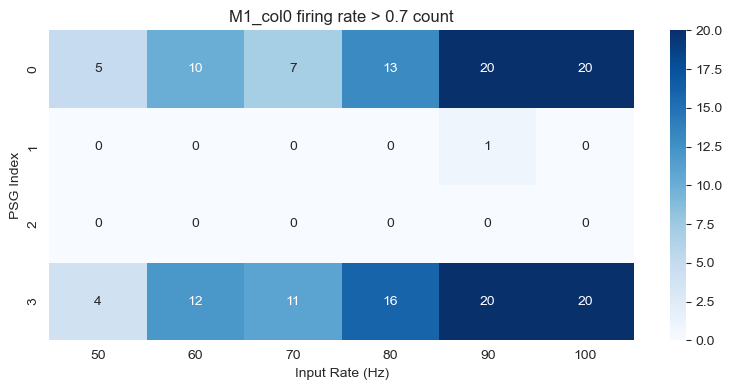

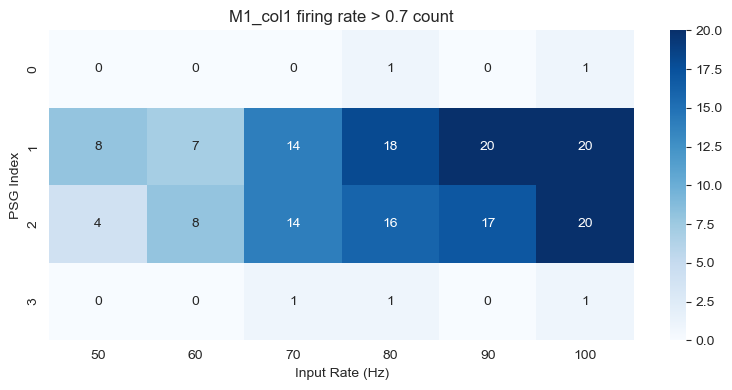

In [41]:
threshold = 0.7

results = []

for psg in sorted(df['psg'].unique()):
    for rate in sorted(df['rate'].unique()):
        sub_df = df[(df['psg'] == psg) & (df['rate'] == rate)]
        count_col0 = (sub_df['M1_col0'] > threshold).sum()
        count_col1 = (sub_df['M1_col1'] > threshold).sum()
        results.append({
            'psg': psg,
            'rate': rate,
            'M1_col0_count': count_col0,
            'M1_col1_count': count_col1
        })

count_df = pd.DataFrame(results)

heatmap_col0 = count_df.pivot(index='psg', columns='rate', values='M1_col0_count')
heatmap_col1 = count_df.pivot(index='psg', columns='rate', values='M1_col1_count')

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_col0, annot=True, fmt="d", cmap="Blues")
plt.title(f"M1_col0 firing rate > {threshold} count")
plt.xlabel("Input Rate (Hz)")
plt.ylabel("PSG Index")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_col1, annot=True, fmt="d", cmap="Blues")
plt.title(f"M1_col1 firing rate > {threshold} count")
plt.xlabel("Input Rate (Hz)")
plt.ylabel("PSG Index")
plt.tight_layout()
plt.show()

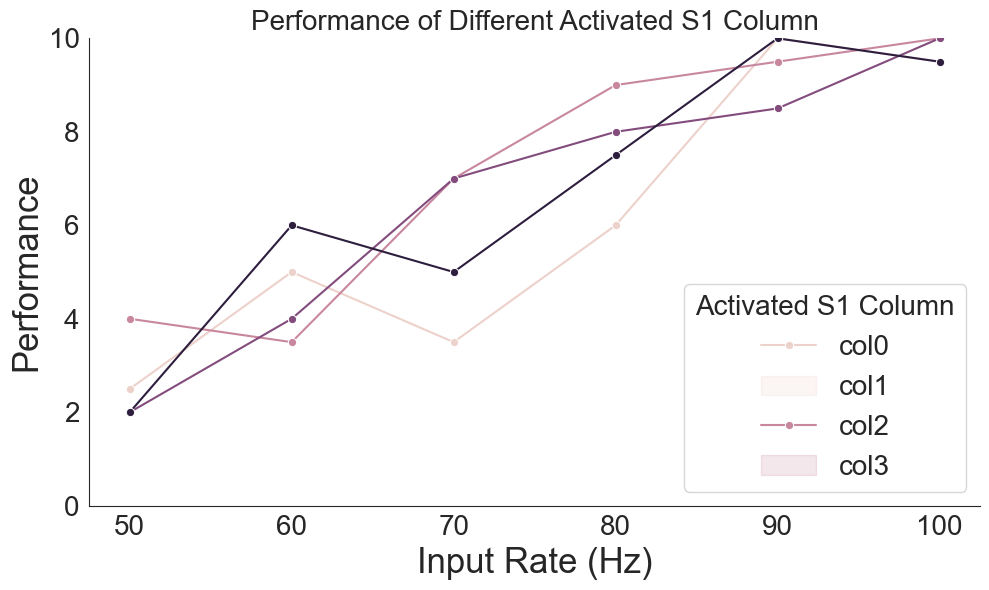

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 计算 performance（假设 count_df 已存在） ---
threshold = 0.7
perf_records = []

for psg in sorted(count_df['psg'].unique()):
    for rate in sorted(count_df['rate'].unique()):
        row = count_df[(count_df['psg'] == psg) & (count_df['rate'] == rate)].iloc[0]
        if psg in [0, 3]:
            perf = 0.5*(row['M1_col0_count'] - row['M1_col1_count'])
        else:
            perf = 0.5*(row['M1_col1_count'] - row['M1_col0_count'])
        perf_records.append({'psg': psg, 'rate': rate, 'performance': perf})

perf_df = pd.DataFrame(perf_records)

# --- 绘图部分（只放大字体） ---
sns.set_style("white")
plt.figure(figsize=(10, 6))

sns.lineplot(data=perf_df, x='rate', y='performance', hue='psg', marker='o')

# 放大字体（约3倍）
plt.title("Performance of Different Activated S1 Column", fontsize=20)
plt.xlabel("Input Rate (Hz)", fontsize=25)
plt.ylabel("Performance", fontsize=25)
plt.ylim(0, 10)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 图例设置
plt.legend(
    title='Activated S1 Column',
    labels=['col0', 'col1', 'col2', 'col3'],
    title_fontsize=20,
    fontsize=20
)

sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.savefig("count_based_performance_bigfont.svg", format='svg')
plt.show()
